- Este proyecto tiene como objetivo analizar y comprobar diferentes hipotesis en una base de datos sobre las estadisticas de diferentes empresas de taxis en Estados Unidos.   

In [54]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
from scipy import stats as st

In [55]:
company = pd.read_csv('moved_project_sql_result_01.csv') 
neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
weather_duration = pd.read_csv('moved_project_sql_result_07.csv')
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [56]:
print(company.head(10))
print(company['company_name'].duplicated().sum())
print(company['trips_amount'].duplicated().sum())

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
0
8


In [57]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [58]:
print(neighborhoods.head(10))
print(neighborhoods['dropoff_location_name'].duplicated().sum())
print(neighborhoods['average_trips'].duplicated().sum())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667
0
0


In [59]:
print(weather_duration.head(5))
weather_duration['start_ts'] = pd.to_datetime(weather_duration['start_ts'], format='%Y-%m-%d %H:%M:%S')
weather_duration.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


<Axes: xlabel='company name', ylabel='trips amount'>

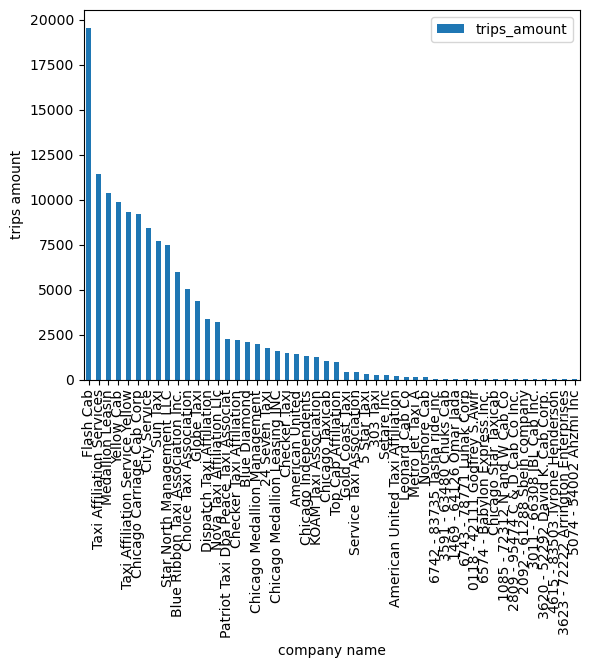

In [60]:
top_50_company = company.head(50) 
top_50_company.plot(kind='bar', x='company_name', y='trips_amount', rot=90, xlabel='company name', ylabel='trips amount')

- La compañia flash cap domina el mercado con una gran diferencia, sin embargo, sigue habiendo muchas compañias compitiendo despues de flash cap y la mayoria esta mas equilibrada. 

<Axes: xlabel='neighborhoods', ylabel='finished trips'>

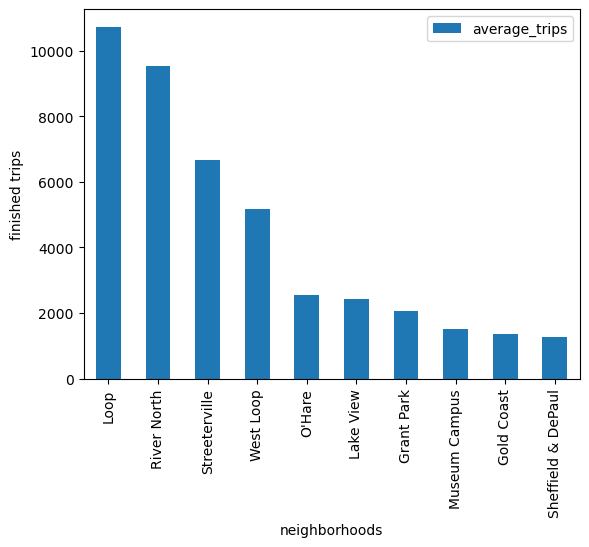

In [61]:
top_10_neighborhoods = neighborhoods.head(10)
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', ylabel='finished trips', xlabel='neighborhoods')

- En el ranking de los 10 barrios e n los que mas viaje sterminan tenemos 4 barrios principales, llegando a recibir mas de 10000, los otros seis reciben alrededor de 2000.

In [62]:
rainy_trips = weather_duration.query("start_ts.dt.dayofweek == 5 and weather_conditions == 'Bad'")
alpha = 0.5
ttest_rainy_trips = st.ttest_1samp(rainy_trips['duration_seconds'], weather_duration['duration_seconds'].mean())
if ttest_rainy_trips.pvalue < alpha:
    print('no hay suficiente evidencia para decir que la media de viajes es diferente en los dias lluviosos')
else:
    print('La media de viajes es diferente los dias lluviosos')

no hay suficiente evidencia para decir que la media de viajes es diferente en los dias lluviosos
